# Importing Libraries

In [39]:
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import accuracy_score
from imblearn.under_sampling import RandomUnderSampler, NearMiss
from imblearn.over_sampling import RandomOverSampler, SMOTE
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Loading , Splitting and Plotting Data

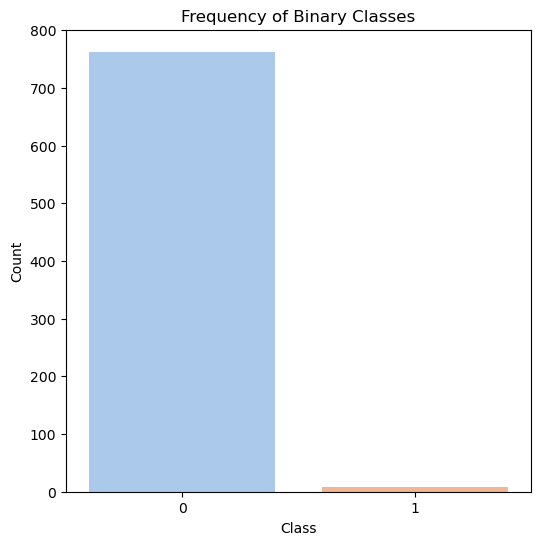

In [40]:


# Load the data
url = 'https://raw.githubusercontent.com/AnjulaMehto/Sampling_Assignment/main/Creditcard_data.csv'
credit_data = pd.read_csv(url)

# Split the data into features and target
X_features = credit_data.drop('Class', axis=1)
y_target = credit_data['Class']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size=0.2, random_state=42)

# Current data plot (imbalanced)
plt.figure(figsize=(6, 6))
sns.countplot(x='Class', data=credit_data, palette='pastel')
plt.title('Frequency of Binary Classes')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()


# Defining formulae and techniques

In [41]:
# Define the z-value and margin of error for each sampling technique
z_value = 2.576  # 99% confidence interval
margin_error = 0.05  # margin of error

# Calculate the sample size for each sampling technique using the formula
sample_size = int(np.ceil((z_value**2 * 0.5 * (1-0.5)) / (margin_error**2)))

# Define the sampling techniques and models
under_sampler = RandomUnderSampler(sampling_strategy='majority', random_state=40)
over_sampler = RandomOverSampler(sampling_strategy='minority', random_state=40)
smote_sampler = SMOTE(sampling_strategy='minority', random_state=40)
near_miss_sampler = NearMiss(version=3, n_neighbors=4)
stratified_kfold_sampler = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

logistic_regression_model = LogisticRegression(random_state=42, max_iter=500)
decision_tree_model = DecisionTreeClassifier(random_state=42)
random_forest_model = RandomForestClassifier(random_state=42)
svc_model = SVC(random_state=42)
knn_model = KNeighborsClassifier(n_neighbors=5)

# Define a dictionary to hold the sampling techniques and models
sampling_methods = {
    'UnderSampler': under_sampler,
    'OverSampler': over_sampler,
    'SMOTE': smote_sampler,
    'NearMiss': near_miss_sampler,
    'StratifiedKFold': stratified_kfold_sampler,
}

classification_models = {
    'LogisticRegression': logistic_regression_model,
    'DecisionTree': decision_tree_model,
    'RandomForest': random_forest_model,
    'SVC': svc_model,
    'KNN': knn_model,
}


# fitting the models

In [42]:

# Evaluate each model on each sampling technique
evaluation_results = {}
for sampling_name, sampling_method in sampling_methods.items():
    if isinstance(sampling_method, StratifiedKFold):
        for train_index, test_index in sampling_method.split(X_train, y_train):
            X_resampled, y_resampled = X_train.iloc[train_index], y_train.iloc[train_index]
    else:
        # Undersample or oversample the training data
        X_resampled, y_resampled = sampling_method.fit_resample(X_train, y_train)

    # Limit the resampled data to the sample size
    if len(X_resampled) > sample_size:
        X_resampled = X_resampled[:sample_size]
        y_resampled = y_resampled[:sample_size]

    for model_name, classification_model in classification_models.items():
        # Train the model on the resampled data
        classification_model.fit(X_resampled, y_resampled)

        # Make predictions on the test data
        y_predicted = classification_model.predict(X_test)

        # Calculate the accuracy score
        accuracy_value = accuracy_score(y_test, y_predicted)

        # Add the accuracy score to the results dictionary
        if model_name in evaluation_results:
            evaluation_results[model_name][sampling_name] = accuracy_value
        else:
            evaluation_results[model_name] = {sampling_name: accuracy_value}


# Printing the results

In [43]:
# Print the results
print('Evaluation Results:')
print('{:<23} {:<23} {:<23} {:<18} {:<13} {:<10}'.format('', 'UnderSampler', 'OverSampler', 'SMOTE', 'NearMiss', 'StratifiedKFold'))

for model_name, model_results in evaluation_results.items():
    print('{:<23}'.format(model_name), end='')
    for sampler_name in sampling_methods.keys():
        if sampler_name in model_results:
            print('{:<23.4f}'.format(model_results[sampler_name]), end='')
        else:
            print('{:<23}'.format(''), end='')
    print()


Evaluation Results:
                        UnderSampler            OverSampler             SMOTE              NearMiss      StratifiedKFold
LogisticRegression     0.5871                 0.9935                 0.9935                 0.3806                 0.9935                 
DecisionTree           0.5677                 0.9742                 0.9290                 0.6968                 0.9935                 
RandomForest           0.6581                 0.9935                 0.9935                 0.7355                 0.9935                 
SVC                    0.6645                 0.9935                 0.9935                 0.5161                 0.9935                 
KNN                    0.6839                 0.9806                 0.9871                 0.4645                 0.9935                 
